In [1]:
from noisegen import NoiseGenerator
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In this notebook we will generate real valued samples of white noise. First we must specify which frequencies will be included in samples. We choose to include 1001 evenly spaced frequencies between 0 Hz and 100 Hz.

In [2]:
n_frequencies = 1001
f_interval = 0.1
generator = NoiseGenerator(n_frequencies=n_frequencies, f_interval=f_interval)

Next we specify the power spectral density to be white, and the variance of the noise samples will be 2.0.

In [3]:
variance = 2.0
generator.specify_psd('white', normalization=variance)

Then we generate 1000 time series of the noise.

In [4]:
n_traces = 1000
generator.generate_trace(n_traces=n_traces)

100%|██████████| 1000/1000 [00:00<00:00, 2214.07it/s]


We can now plot some of the samples we have generated.

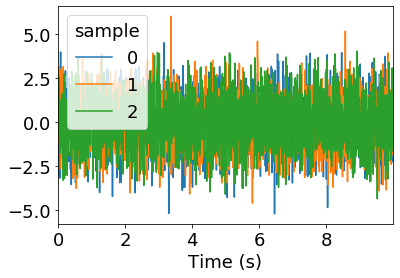

In [5]:
axes = generator.samples.iloc[:,0:3].plot()
text = axes.set_xlabel('Time (s)')

We may wish to perform some diagnostics on our noise to check that it has the properties we desire. First we will calculate its variance.

In [6]:
measured_variance = np.var(generator.samples.values.flatten())
print('Variance is found to be '+str(measured_variance))

Variance is found to be 2.0016961263123796


This figure looks close to our desired value of 2.0. Next we will plot the power spectral density.

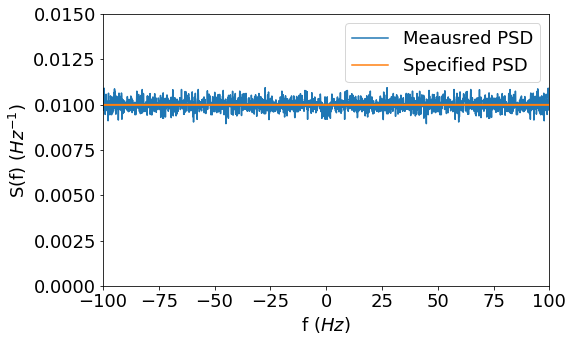

In [7]:
axes = generator.plot_psd()
axes.legend(['Meausred PSD','Specified PSD'])
axes.set_ylim([0,0.015])
xlabel = axes.set_xlabel(r'f $(Hz)$')
ylabel = axes.set_ylabel(r'S(f) $(Hz^{-1})$')

Finally we plot the autocorrelation function of the noise.

Text(0, 0.5, '$\\langle Y(t) Y(0) \\rangle$')

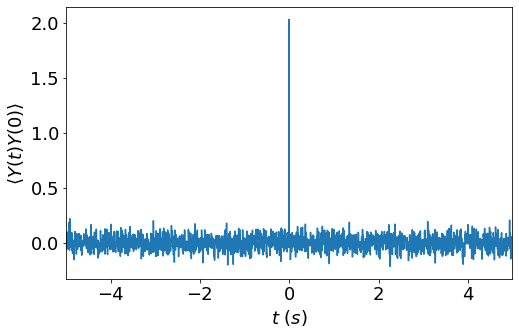

In [8]:
axes = generator.plot_autocorrelation()
axes.set_xlabel(r'$t$ $(s)$')
axes.set_ylabel(r'$\langle Y(t) Y(0) \rangle$')

The noise appears to be delta correlated with a variance close to 2.0.